#"Handwritten Digit Recognition using Neural Networks on the MNIST Dataset"

This title reflects the core elements of your project: using neural networks to classify handwritten digits, with the MNIST dataset serving as the foundation for training and evaluation. If you have a specific focus or additional aspects of the project you'd like to highlight in the title, feel free to adjust it accordingly!


#datasets: This submodule provides various datasets that are commonly used for training and evaluating machine learning models. In this project, we use the MNIST dataset, which is included in datasets.

**layers**: This submodule contains different types of neural network layers that can be used to build models. Examples include Dense layers, Convolutional layers, and more.

**models**: This submodule provides a way to define and train models. It includes functions and classes for creating both sequential and functional models.

**datasets.mnist.load_data(): This function loads the MNIST dataset, which is a collection of 70,000 images of handwritten digits (0-9). The dataset is split into a training set and a test set.**

**train_images, train_labels: These are the images and corresponding labels for the training set. There are 60,000 training images.**

**test_images, test_labels: These are the images and corresponding labels for the test set. There are 10,000 test images.**

In [20]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images to the range [0, 1]
# This step scales down the pixel values of the images to a range between 0 and 1. In the original MNIST dataset,
# pixel values range from 0 to 255 (since they are grayscale images).
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the images to 1D vectors
# Reshape each image from 2D (28x28) to 1D (784)
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

# Ensure the data type is float32
# Convert the pixel values to float32 for compatibility with TensorFlow/Keras
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Check the shape and data type
print('Training data shape:', train_images.shape)
print('Training labels shape:', train_labels.shape)
print('Test data shape:', test_images.shape)
print('Test labels shape:', test_labels.shape)

print('Training data type:', train_images.dtype)
print('Training labels data type:', train_labels.dtype)

# Define the model
# Sequential model with two Dense layers
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),  # First hidden layer with 128 neurons
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit)
])

# Compile the model
# Configure the model for training with optimizer, loss function, and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Metric to evaluate during training

# Train the model
# Fit the model on training data
model.fit(train_images, train_labels, epochs=5)


Training data shape: (60000, 784)
Training labels shape: (60000,)
Test data shape: (10000, 784)
Test labels shape: (10000,)
Training data type: float32
Training labels data type: uint8
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2632 - accuracy: 0.9249
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1150 - accuracy: 0.9658
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0778 - accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0576 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0455 - accuracy: 0.9860


In [21]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Print the test accuracy rounded to four decimal places
print(f'Test accuracy: {test_accuracy:.4f}')


313/313 [==============================] - 1s 2ms/step - loss: 0.0809 - accuracy: 0.9748
Test accuracy: 0.9748


313/313 [==============================] - 1s 4ms/step


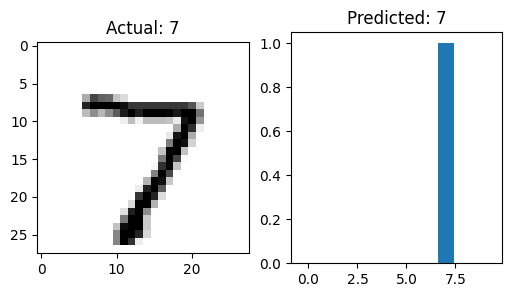

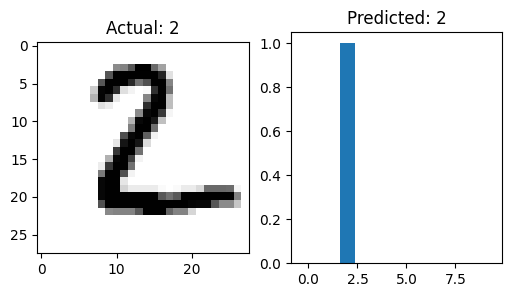

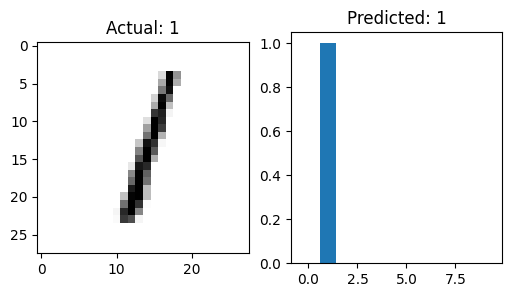

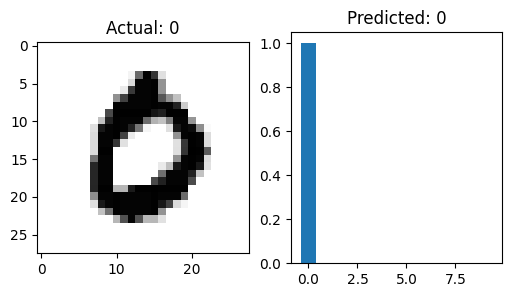

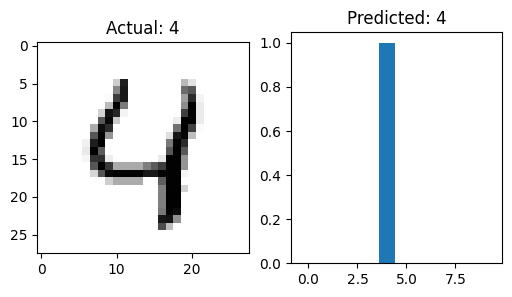

In [22]:
# Make predictions on the test set
predictions = model.predict(test_images)

# Function to plot image and prediction
def plot_image_and_prediction(index):
    # Create a figure with size 6x3 inches
    plt.figure(figsize=(6,3))

    # Plot the actual image in the left subplot
    plt.subplot(1,2,1)
    plt.imshow(test_images[index].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f'Actual: {test_labels[index]}')  # Set the title with actual label

    # Plot the predicted probabilities in the right subplot
    plt.subplot(1,2,2)
    plt.bar(range(10), predictions[index])  # Bar plot of predicted probabilities for each digit
    plt.title(f'Predicted: {np.argmax(predictions[index])}')  # Set the title with predicted label
    plt.show()  # Display the plot

# Plot a few predictions
for i in range(5):
    plot_image_and_prediction(i)  # Call the function to plot image and prediction for each index


This will display the actual and predicted labels for a few test images, allowing you to visually assess the model's performance.






